In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import mineut
from mineut import plot_tools as pt
from mineut import lattice_tools as lt

## Example 1 -- Muon decay at rest.

We should recover the Michel spectrum and a slightly less energetic nu_mubar component.

In [3]:
from mineut.MuC import MuDecaySimulator

design = {
    "name": r"$\mu^+$DAR",
    "short_name": "mudar",
    "Nmu_per_bunch": 1e12,  # 4.9e9 * 4.5e3 * 1.2e7,
    "duty_factor": 1,
    "bunch_multiplicity": 1,
    "finj": 1,
    "muon_polarization": 0.0,

    }

mudar_numu = MuDecaySimulator(design, nuflavor='numu', n_evals=1e5)
mudar_nue = MuDecaySimulator(design, nuflavor='nue', n_evals=1e5)

In [4]:
mudar_numu.decay_muons()
mudar_nue.decay_muons()

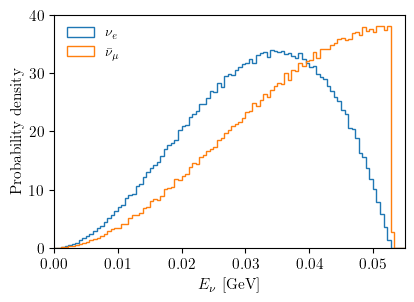

In [5]:
fig, ax = pt.std_fig()
en_bins = np.linspace(0, 0.055, 100)
_=ax.hist(mudar_nue.pnu_restframe['E'], weights=mudar_nue.weights, bins=en_bins, density=True, histtype='step', label=r'$\nu_e$')
_=ax.hist(mudar_numu.pnu_restframe['E'], weights=mudar_numu.weights, bins=en_bins, density=True, histtype='step', label=r'$\bar\nu_\mu$')
ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel("Probability density")
ax.legend()
ax.set_xlim(0, 0.055)
fig.savefig('plots/mudar_nu_spectrum.pdf', bbox_inches='tight')


## Example 2 -- muon storage rings

Now let's place muons in storage rings with a given momentum

In [116]:
design = {
    "name": r"$\nu$STORM",
    "short_name": "nustorm",
    "muon_polarization": 0.0,
    }

nufact_numu = MuDecaySimulator(
    design,
    nuflavor='numu',
    direction="right",
    n_evals=1e5,
    )

nufact_nue = MuDecaySimulator(
    design,
    nuflavor='nue',
    direction="right",
    n_evals=1e5,
    )


In [117]:
nufact_numu.decay_muons()
nufact_nue.decay_muons()

In [118]:
racetrack_lattice = lt.create_racetrack_lattice(
            straight_length=100e2,
            total_length=300e2,
            n_elements=100_000,
            beam_p0=3.8,
            beamdiv=1e-3,
            beamdiv_z=0.1,
            beamsize=1,
        )

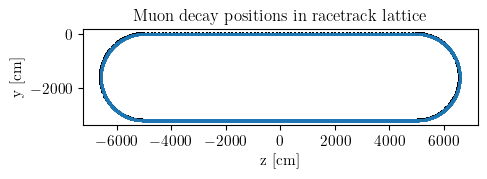

In [119]:
nufact_nue.place_muons_on_lattice(lattice=racetrack_lattice, direction="clockwise")
nufact_numu.place_muons_on_lattice(lattice=racetrack_lattice, direction="clockwise")

fig, ax = pt.std_fig(figsize=(5, 2))
ax.scatter(racetrack_lattice.vertices[0], racetrack_lattice.vertices[1], c='black', marker='+', s=10)
ax.scatter(nufact_numu.pos['z'], nufact_numu.pos['y'], marker='.', s=0.5)
fig.gca().set_aspect('equal', adjustable='box')
ax.set_xlabel("z [cm]")
ax.set_ylabel("y [cm]")
ax.set_title("Muon decay positions in racetrack lattice")
fig.savefig('plots/nufactory_muon_decay_positions.pdf', bbox_inches='tight')

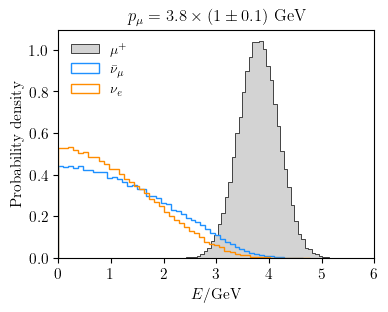

In [120]:
fig, ax = pt.std_fig(figsize=(4,3))
fsize=12
n_bins = 50
ax.hist(nufact_numu.pmu['E'], weights=nufact_numu.weights, bins=n_bins, label=r'$\mu^+$', facecolor='lightgrey', edgecolor='black', lw=0.5, histtype='stepfilled', density=True)
ax.hist(nufact_numu.pnu['E'], weights=nufact_numu.weights, bins=n_bins, label=r'$\bar\nu_\mu$', color='dodgerblue', histtype='step', density=True)
ax.hist(nufact_nue.pnu['E'], weights=nufact_nue.weights, bins=n_bins, label=r'$\nu_e$', color='darkorange', histtype='step', density=True)

ax.legend(frameon=False,loc='upper left')
ax.set_xlim(0,6)
# ax.set_yscale('log')
ax.set_ylabel(r'Probability density')
ax.set_xlabel(r'$E/$GeV')
ax.set_title(r'$p_\mu = 3.8 \times (1 \pm 0.1)$~GeV',fontsize=fsize)

fig.savefig('plots/lattice_test.pdf', dpi=300, bbox_inches='tight')

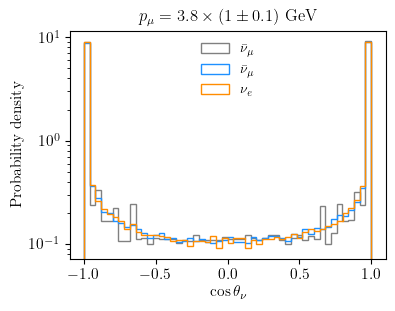

In [121]:
fig, ax = pt.std_fig(figsize=(4,3))
fsize=12
n_bins = 50
ax.hist(nufact_numu.pmu['pz']/nufact_numu.pmu['E'], weights=nufact_numu.weights, bins=n_bins, label=r'$\bar\nu_\mu$',color='grey', histtype='step', density=True)
ax.hist(nufact_numu.pnu['pz']/nufact_numu.pnu['E'], weights=nufact_numu.weights, bins=n_bins, label=r'$\bar\nu_\mu$',color='dodgerblue', histtype='step', density=True)
ax.hist(nufact_nue.pnu['pz']/nufact_nue.pnu['E'], weights=nufact_nue.weights, bins=n_bins, label=r'$\nu_e$',color='darkorange', histtype='step', density=True)

ax.legend(frameon=False,loc='upper center')
# ax.set_xlim(0,6)
ax.set_yscale('log')
ax.set_ylabel(r'Probability density')
ax.set_xlabel(r'$\cos{\theta_\nu}$')
ax.set_title(r'$p_\mu = 3.8 \times (1 \pm 0.1)$~GeV',fontsize=fsize)

fig.savefig('plots/3p8GeV_lattice_angle.pdf', dpi=300, bbox_inches='tight')

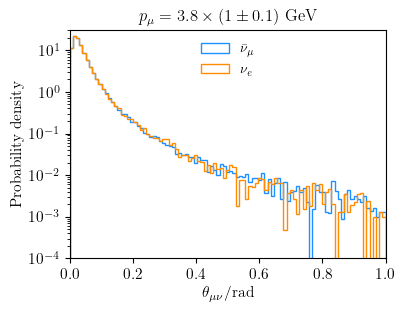

In [122]:
fig, ax = pt.std_fig(figsize=(4,3))
fsize=12
theta_max = 1 # rad
bins = np.linspace(0, theta_max, 100)
ax.hist(nufact_numu.pmu.deltaangle(nufact_numu.pnu), weights=nufact_numu.weights, bins=bins, label=r'$\bar\nu_\mu$',color='dodgerblue', histtype='step', density=True)
ax.hist(nufact_nue.pmu.deltaangle(nufact_nue.pnu), weights=nufact_nue.weights, bins=bins, label=r'$\nu_e$',color='darkorange', histtype='step', density=True)

ax.legend(frameon=False,loc='upper center')
ax.set_ylim(1e-4, 30)
ax.set_xlim(0, theta_max)
ax.set_yscale('log')
ax.set_ylabel(r'Probability density')
ax.set_xlabel(r'$\theta_{\mu\nu}$/rad')
ax.set_title(r'$p_\mu = 3.8 \times (1 \pm 0.1)$~GeV',fontsize=fsize)

fig.savefig('plots/3p8GeV_lattice_opening_angle.pdf', dpi=300, bbox_inches='tight')

In [181]:
enu_edges = np.linspace(0, 5, 50)
enu = (enu_edges[1:] + enu_edges[:-1]) / 2

_, flux_numu = nufact_numu.get_flux_at_generic_location(
        det_location=[0, 0, 100e2],
        det_radius=10e2,
        ebins=enu_edges,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_nue = nufact_nue.get_flux_at_generic_location(
        det_location=[0, 0, 100e2],
        det_radius=10e2,
        ebins=enu_edges,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

(0.0, 0.0, 10000.0)
(0.0, 0.0, 10000.0)


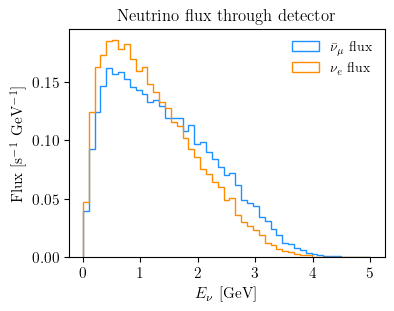

In [182]:
fig, ax = pt.std_fig(figsize=(4,3))
_=ax.hist(enu, bins = enu_edges, weights=flux_numu, label=r'$\bar\nu_\mu$ flux', histtype='step', color='dodgerblue')
_=ax.hist(enu, bins = enu_edges, weights=flux_nue, label=r'$\nu_e$ flux', histtype='step', color='darkorange')
ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Flux [s$^{-1}$ GeV$^{-1}$]")
ax.set_title("Neutrino flux through detector")
ax.legend()
fig.savefig('plots/nufactory_flux.pdf', bbox_inches='tight')

# Simplified parameterized lattices

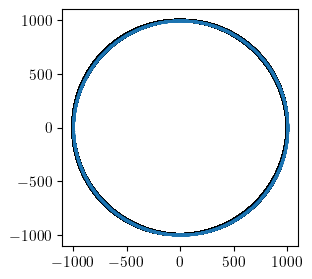

In [183]:
elliptical_lattice = lt.create_elliptical_lattice(
    length_minor=10e2,
    length_major=10e2,
    center=(0, 0),
    n_elements=100_000,
    beam_p0=3.8,
    beamdiv=1e-3,
    beamdiv_z=0.1,
    beamsize=1,
    )

nufact_nue.place_muons_on_lattice(lattice=elliptical_lattice, direction="clockwise")
nufact_numu.place_muons_on_lattice(lattice=elliptical_lattice, direction="clockwise")

plt.scatter(elliptical_lattice.vertices[0], elliptical_lattice.vertices[1], c='black', marker='+', s=10)
plt.scatter(nufact_numu.pos['z'], nufact_numu.pos['y'], marker='.', s=0.2)
plt.gca().set_aspect('equal', adjustable='box')

# Collider lattices

In [184]:
import pickle
with open('beam-optics/ring_v06_smoothed.pkl', 'rb') as f:
    lattice_10TeV_dict = pickle.load(f)
with open('beam-optics/ring_3tev_v1.2_smoothed.pkl', 'rb') as f:
    lattice_3TeV_dict = pickle.load(f)

In [185]:
lattice_10TeV = lt.Lattice(**lattice_10TeV_dict)
lattice_3TeV = lt.Lattice(**lattice_3TeV_dict)

Setting additional dispersion_Dx to <scipy.interpolate._interpolate.interp1d object at 0x17efa82d0>
Setting additional dispersion_Dpx to <scipy.interpolate._interpolate.interp1d object at 0x17efaa210>
Warning! The following keys were not recognized and will be ignored: dict_keys(['dispersion_Dx', 'dispersion_Dpx'])
Setting additional dispersion_Dx to <scipy.interpolate._interpolate.interp1d object at 0x17efa83c0>
Setting additional dispersion_Dpx to <scipy.interpolate._interpolate.interp1d object at 0x17efa9a90>
Warning! The following keys were not recognized and will be ignored: dict_keys(['dispersion_Dx', 'dispersion_Dpx'])


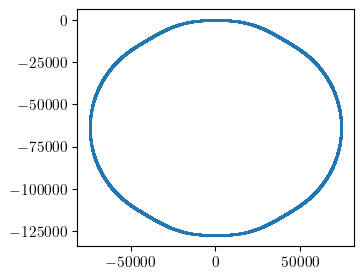

In [186]:
nufact_nue.place_muons_on_lattice(lattice_3TeV)
nufact_numu.place_muons_on_lattice(lattice_3TeV)

plt.scatter(nufact_numu.pos['z'], nufact_numu.pos['y'], marker='.', s=0.5)
plt.gca().set_aspect('equal', adjustable='box')

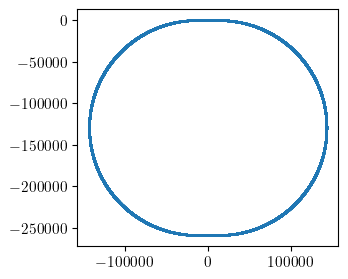

In [187]:
nufact_nue.place_muons_on_lattice(lattice_10TeV)
nufact_numu.place_muons_on_lattice(lattice_10TeV)

plt.scatter(nufact_numu.pos['z'], nufact_numu.pos['y'], marker='.', s=0.5)
plt.gca().set_aspect('equal', adjustable='box')